# CP 2025-26: Assignment 6 - Boundary value problems 

### General Guidelines

> ⚠️⚠️⚠️ READ CAREFULLY ⚠️⚠️⚠️

- Do not add, delete or create cells, write the answer only in the space marked with the three dots (`...`). Where function skeletons are provided, it is assumed that that function can be called again with different inputs somewhere else. So be careful to write code outside of functions.
  - Function should be ['pure'](https://en.wikipedia.org/wiki/Pure_function), thus no side effects, unless otherwise specified.
- Run the the first cell to import all libraries when opening the notebook before running your own code.
- Read carefully what is required to be printed/returned/plotted in the answer. Please do not output what is not asked for. 
  - If you used the print function for debugging, comment it out ( Ctlr + / ) before submitting
- All plots should have title, xlabel, ylabel, and legend (if there are more than one curve on the plot)
- Use the `help()` function, consult python documentation when using new functions, or do a web search and consult [stackoverflow](https://stackoverflow.com/questions/tagged/python)
- Please read the error messages if you get any, and try to understand what they mean. Debugging code is an essential skill to develop.
- You can use `%debug` to start an IPython console in a cell (or a scratchpad cell!) after an exception has occurred to try to debug.
- You can use `%pdb` to toggle the Python DeBugger (pdb) auto start after an unhandled exception.
- In the assignments you will find some tests put in place, to help you verify your solution. If these fail you are certain you did something wrong, thus look at the hints they provide. But passing these tests does __not__ mean your solution is actually correct.

Make sure you use `python3.12` and the package versions as stated in the provided `requirements.txt`. This file should also be on the course page.

In [1]:
# Importing relevant libraries in the assignment

# This will create static plots (no zooming etc.)
# otherwise try just plain `%matplotlib`, or install a backend such as ipympl or PyQt5 and
# do or `%matplotlib ipympl` `%matplotlib qt`
%matplotlib inline

REPEAT_IMPORTS = True

if REPEAT_IMPORTS or ("IMPORTED_ALL" not in globals()):  # To save you a bit of time

    def print_import_info(package):
        print(
            "Successfully imported %-15s \tVersion: %10s"
            % (package.__name__, package.__version__)
        )

    ### Standard library imports

    import sys

    print("Python version {}".format(sys.version))
    if sys.version_info < (3, 12):
        print(
            "\u001b[31m"  # red
            "\u001b[1m"  # bold
            "WARNING: Use Python 3.12 or newer to not encounter any errors or "
            "problems later on.\n"
            "\u001b[0m"  # reset
        )
    del sys  # Do not need it anymore

    import typing
    from typing import Callable, List, Tuple, Union

    ### Import third party libraries
    # Initialize self assessment helper
    import otter

    grader = otter.Notebook("Assignment_Q1_L6.ipynb")

    import numpy as np
    import numpy.typing as npt

    print_import_info(np)

    import scipy
    from scipy import integrate

    print_import_info(scipy)

    import matplotlib
    import matplotlib.pyplot as plt

    print_import_info(matplotlib)

    IMPORTED_ALL = True
    print("Finished importing packages")
else:
    print("Already imported all packages")

Python version 3.12.10 (v3.12.10:0cc81280367, Apr  8 2025, 08:46:59) [Clang 13.0.0 (clang-1300.0.29.30)]
Successfully imported numpy           	Version:      2.3.2
Successfully imported scipy           	Version:     1.16.1
Successfully imported matplotlib      	Version:     3.10.5
Finished importing packages


## Introduction: Poisson-Boltzmann equation

*Below follows some theory background about the Poisson-Blotzmann equation that you are going to solve. However there is no need to understand the equation in order to solve the assignment. The assignment starts at [Question 1](#question-1-linearised-system).*

#### Poisson equation
[The Poisson equation](https://en.wikipedia.org/wiki/Poisson%27s_equation) is a fundamental equation in electrostatics.

$$
\nabla^2\phi = -\frac{\rho}{\epsilon_0}
\tag{Eq. 1}
$$

Here, $\phi$ is the electric potential and the $\rho$ term refers to the volumetric charge density in the system with $\epsilon_0$ being the permittivity of the medium.

#### Boltzmann statistics
When an ionic solution comes into contact with a charged solid, e.g. the glass wall of a microchannel, a charge distribution is created by the free motion of ions inside the solution. The ions in the solution are free to move about according to Boltzmann statistics, but their overall distribution is influenced by the wall charge/wall potential.

$$
c^- = c^{-}_{0}\exp\left(\frac{e\phi(x,y,z)}{k_BT}\right)
\tag{Eq. 2}
$$

$$
c^+ = c^{+}_{0}\exp\left(\frac{-e\phi(x,y,z)}{k_BT}\right)
\tag{Eq. 3}
$$

with $c^+/c^-$ being the cation/anion distribution, $c^{+}_{0}/c^{-}_{0}$ being the reference cation/anion distribution, $k_B$ being the Boltzmann constant, $T$ being the temperature, $e$ being the elementary charge, and $x$ ,$y$, $z$ the coordinates.

<center>



</center>

#### Poisson-Boltzmann equation

Substituting the Boltzmann ion concentration distribution ($\text{Eq. 2,3}$) in the Poisson equation ($\text{Eq. 1}$), and considering the wall to be sufficiently large such that the charge distribution effects are only relevant in one dimension, we get the 1-D Poisson-Boltzmann equation (PB equation),

$$
\frac{d^2 \phi}{d x^2} = \frac{e}{\epsilon}\left(c^{-}_{0} \exp\left(\frac{e\phi(x)}{k_BT}\right) - c^{+}_{0} \exp\left(\frac{-e\phi(x)}{k_BT}\right)\right)
\tag{Eq. 4}
$$

A common scaling parameter for the Poisson-Boltzmann equation is the thermal voltage, or $\frac{k_BT}{e}$, which is 0.025875 V at room temperature. For a small value of wall potential (also called the Zeta-Potential) $\phi$, i.e. smaller than 0.025875 V, the exponential terms in the above Poisson-Boltzmann Equation can be approximated as linear terms.
Thus, the equation to solve in one dimension reduces to:

\begin{equation}
\frac{d^2 \phi}{d x^2} = \frac{e}{\epsilon}\left(c^{-}_{0}\frac{e\phi(x)}{k_BT} + c^{+}_{0}\frac{e\phi(x)}{k_BT}\right)
\tag{Eq. 5}
\end{equation}

At the wall, a Dirichlet boundary condition exists with a fixed wall potential $(\phi(x=0) = \phi_0)$, and far away from the wall the potential ceases to change, with a Neumann boundary condition describing this as the gradient of potential being 0 $(\frac{d \phi}{d x}(x\to\infty) = 0)$.

The analytical solution of this differential equation was found to be:

\begin{equation}
\phi (x) = \phi_0 \exp\left({-ex\sqrt{\frac{N_A(C_{0}^{+}z_+^2+C_{0}^{-}z_-^2)}{k_BT\epsilon}}}\right)
\tag{Eq. 6}
\end{equation}

Here, $z$ is the charge of the cation ($z_+$) and the anion ($z_-$), and $N_A$ is the Avogadro constant. For further information on the derivation of the analytical solution we refer you to the MTP course chapter 6.

## Question 1: Linearised system

### Question 1.1: Analytical solution

The analytical solution of the linearized Poisson-Boltzmann equation can be rewritten as

\begin{equation}
\phi(x) = \phi_0 \exp\left({\frac{-x}{\lambda}}\right)
\tag{Eq. 7}
\end{equation}

The $\lambda$ is called Debye Length, which is an indication of the length scale over which the effect of this wall potential is felt. For a general electrolyte, this is given by the following expression (which will be covered in more detail in the course Molecular Transport Phenomena (MTP)):

\begin{equation}
\lambda = \sqrt{\frac{\epsilon k_B T}{e^2 N_A (c_0^{+}z_+^2 + c_0^{-}z_-^2)}}
\tag{Eq. 8}
\end{equation}

Plot this linear system solution in the range of $\frac{x}{\lambda}\in [0,10]$, discretized with **$N$ = 100 grid points**. Take the wall potential to be $\phi_0$ = -0.01 V.

Your code should return:
- The function `analytical_solution` takes the range $\frac{x}{\lambda}$ stored as `xoverlambda` (numpy array) and the wall potential $\phi_0$ (float) stored as `phi0` as input arguments (in this specific order) and returns the analytical linear solution $\phi(x)$ as a numpy array. Remember to define type hints and docstrings.
- The analytical solution stored in `analytical_potentials`.
- A plot of the analytical solution.

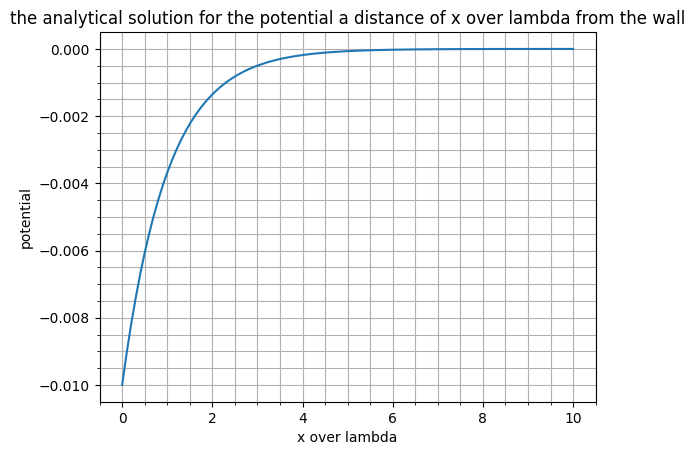

In [12]:
# Define analytical solution function
def analytical_solution(xoverlambda:np.ndarray,phi0:float)->np.ndarray:
    """Analytical solution of the linearized Poisson-Boltzmann equation:
    
    Input: 
    xoverlambda     : np.ndarray
    
    phi0            : float
        the potential at the wall
        
    Return: 
    phi             : float
        the potential a distance of x from the wall"""
    
    phi = phi0 * np.exp(-xoverlambda)
    return phi

N= 100
phi0 = -0.01
xoverlambda = np.linspace(0,10,100)
analytical_potentials = analytical_solution(xoverlambda,phi0)

# Plot results
plt.plot(xoverlambda,analytical_potentials,label ='analytical solutions')
plt.title('the analytical solution for the potential a distance of x over lambda from the wall')
plt.xlabel('x over lambda')
plt.ylabel('potential')
plt.minorticks_on()
plt.grid(which='both')

In [5]:
grader.check("q1_1_1")

q1_1_1 results: All test cases passed!

### Question 1.2: Finite difference method

The 1D **non-dimensional** form of the Poisson-Boltzmann equation can be written as

$$
\frac{d^2 \phi^*}{dx^{*2}} = \phi^* (x^*)
\tag{Eq. 9}
$$

where $x^* = x/\lambda$ and $\phi^* = \phi / V_T$, with $\lambda$ the Debye length and $V_T = k_B T / e$ the thermal voltage (0.025875 V at room temperature).

Boundary conditions in non-dimensional form:
- At the wall, a Dirichlet boundary condition exists with a fixed wall potential: $\phi^*(0) = \phi_0 / V_T$. Take the wall potential to be $\phi_0$ = -0.01 V.
- At the far field there is a Neumann boundary condition describing this as the gradient of potential being 0: $\frac{d \phi^*}{d x^*}(x^*=10) = 0$.


**Objective:** Solve this boundary-value problem using the finite difference method (central difference scheme) in the domain $x^* \in [0,10]$ discretized with **$N$ = 100 grid points** and defined in `xoverlambda`. To implement the Neumann boundary condition, use a second-order central difference formula with a ghost point. This allows the far-field boundary to be written in the same stencil form as the interior points.

Make sure that:
- When building the system matrix, you only solve for the unknowns (Option 2 from the lecture slides). Construct your matrix $A$ and right-hand-side vector $b$ accordingly.
- When presenting your results, make sure your final solution array includes **all** points of the domain, including the Dirichlet boundary at $x^* = 0$.
- Rescale your final solution vector by $V_T$ to obtain the dimensional potential $\phi$.

Your code should return:
- Left-hand-side matrix A defined in `pb_linear_matrix` (non-dimensionalised).
- Right-hand-side vector b defined in `pb_linear_vector` (non-dimensionalised).
- Solution of finite difference method $\phi$ defined in `pb_linear_sol` (with dimensions).
- A plot of the analytical linear solution and the finite difference solution in the same diagram. Make sure to include: title, axis labels, legend.

💡 **Hints**:
1. Use the same `xoverlambda` you defined for the previous question when computing the analytical solution.
2. Use pen and paper to derive the entries of the matrix $A$ and right-hand-side vector $b$ that make up your linear system of equations: $A\phi^*=b$.

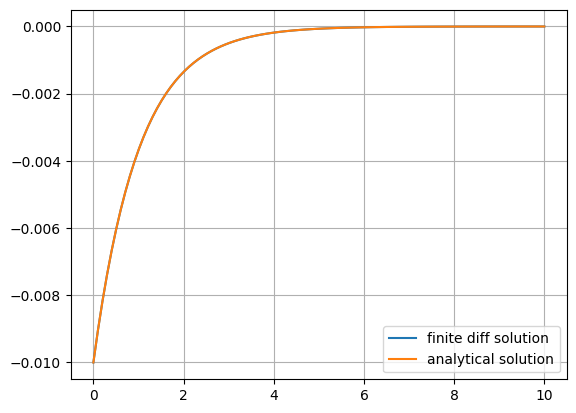

In [21]:
matrix_size = len(xoverlambda) -2 + 1 #plus 1 for the ghost point
h =xoverlambda[1] - xoverlambda[0]
V_T = 0.025875


# you wish to solve this in the following equation format: Ax = b
# create the A matrix 
A = np.eye(matrix_size) * (-2-h**2)
A += np.diag(np.ones(matrix_size-1), k=-1)
A += np.diag(np.ones(matrix_size-1),k=1)

# add the neumann boundary condition to the A matrix 
A[-1,-2]= 2
A[-1,-1] = -(2+h**2)

# define the solution vector b
b = np.zeros(matrix_size)
b[0] = -phi0/V_T

# solve for the x vector this is phi: 
sol = np.zeros(N)
sol[0] = phi0/V_T
sol[1:] = np.linalg.solve(A,b)


# Outputs requested
pb_linear_matrix = A
pb_linear_vector = b



# Dimensional solution
pb_linear_sol = sol*V_T



# Plot results
fig, axe = plt.subplots()
axe.plot(xoverlambda,pb_linear_sol,label = 'finite diff solution')
axe.plot(xoverlambda,analytical_potentials, label = 'analytical solution')
axe.grid()
axe.legend()


In [22]:
grader.check("q1_2")

q1_2 results: All test cases passed!

### Reflect on the results

Evaluate the quality of your finite difference solution compared to the analytical one. In your answer, discuss:

1. How the **grid spacing** affects the accuracy of the finite difference approximation.

2. Whether the **boundary conditions** are enforced exactly in the scheme or only approximately.

Write your discussion in 4–6 sentences in the text box below.

_Type your answer here, replacing this text._

## Question 2: Non-linear system

For larger values of wall potential ($\phi > \frac{k_BT}{e}$), the linear approximation we took is no longer valid, and the equation must be solved with the non-linear terms. Thus, the equation we're trying to solve is

$$
\frac{d^2 \phi}{d x^2} = \frac{e}{\epsilon}\left(c^{-}_{0}\exp\left(\frac{e\phi(x)}{k_BT}\right) - c^{+}_{0}\exp\left(\frac{-e\phi(x)}{k_BT}\right)\right)
\tag{Eq. 4}
$$


For the purpose of this problem, we consider that the solution in the microfluidic channel is a NaCl solution, i.e. a 1-1 electrolyte (both the cation and the anion are monovalent). The assumption means that $c^+_0 = c^-_0 = c_0$.

This will reduce the equation to

$$
\frac{d^2 \phi}{d x^2} = \frac{2c_{0}e}{\epsilon}\sinh\left(\frac{e\phi(x)}{k_BT}\right)
\tag{Eq. 10}
$$

The non-dimensional form of the non-linear Poisson-Boltzmann equation becomes

$$
\frac{d^2 \phi^*}{d x^{*2}} = \sinh\left(\phi^*(x^*)\right)
\tag{Eq. 11}
$$

where $x^* = x/\lambda$ and $\phi^* = \phi / V_T$, with $\lambda$ the Debye length and $V_T = k_B T / e$ the thermal voltage (0.025875 V at room temperature).

Boundary conditions in non-dimensional form:
- At the wall, a Dirichlet boundary condition exists with a fixed wall potential: $\phi^*(0) = \phi_0 / V_T$. Take the wall potential to be $\phi_0$ = -0.01 V.
- At the far field there is a Neumann boundary condition describing this as the gradient of potential being 0: $\frac{d \phi^*}{d x^*}(x^*=10) = 0$.

**Objective:** Solve this non-linear boundary-value problem using the finite difference method (central difference scheme) in the domain $x^* \in [0,10]$ discretized with **$N$ = 100 grid points** and defined in `xoverlambda`. To implement the Neumann boundary condition, use a second-order central difference formula with a ghost point. This allows the far-field boundary to be written in the same stencil form as the interior points.

Make sure that:
- When building the system matrix, you only solve for the unknowns (Option 2 from the lecture slides). Construct your matrix $A$ and right-hand-side vector $b$ accordingly.
- When presenting your results, make sure your final solution array includes **all** points of the domain, including the Dirichlet boundary at $x^* = 0$, so that it can be directly compared with the analytical solution.
- Rescale your final solution vector by $V_T$ to obtain the dimensional potential $\phi$.

💡 **Hints**: 
- Recall from previous lectures, which numerical methods can be used to solve non-linear systems of equations.
- The choice of initial guess has a significant impact on the numerical solution.

### Analytical Solution

The analytical solution for this problem is the Gouy-Chapman equation:

$$
\phi(x) = \frac{4k_BT}{Ze}\tanh^{-1}\left(\tanh\left(\frac{Ze\phi_0}{4k_BT}\right)\cdot \exp\left(\frac{-x}{\lambda}\right)\right)
\tag{Eq. 12}
$$

where:

- $k_B$ is the Boltzmann constant (J/k). You can call `scipy.constants.Boltzmann` to obtain it.
- $T$ is the temperature (K). $T = 298 $ K for this problem.
- $e$ is the elementary charge (C). You can call `scipy.constants.elementary_charge` to obtain it.
- $Z$ is the valence. $Z = 1$ for this problem

### Code Implementation 

Your code should return:
- Your analytical solution saved as `pb_nonlinear_ana_sol`
- Your numerical solution saved as `pb_nonlinear_sol`.
- A plot comparing your analytical and numerical solutions. 

⚠️ In this question, we do not provide autochecks to guide you to the solution, similar to the computer exam. Here, we only have one check for the final soution `pb_nonlinear_sol` and `pb_nonlinear_ana_sol`(this will NOT be given in the exam). Please try to solve the question by yourself before consulting a TA. 


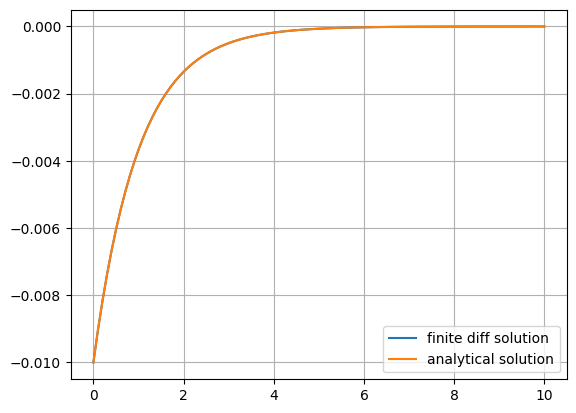

In [36]:
# Define the parameters:
N = 100
matrix_size = N-1
xoverlambda = np.linspace(0,10,N)
h = xoverlambda[1] - xoverlambda[0]

analytical_temp = 298
valence = 1 #Z
K_b = scipy.constants.Boltzmann
e = scipy.constants.elementary_charge
# analytical solution:
def analyticalGouyChapman(xoverlambda:np.ndarray, T:float, Z:float, phi0: float,K_b:float, e:float)->np.ndarray:

    term1 = (4*K_b*T)/(Z*e)
    term2 = (Z*e*phi0)/(4*K_b*T)
    phi = term1*np.arctanh(np.tanh(term2)*np.exp(-xoverlambda))
    return phi



# finite difference solution:
# define the A matrix:
A = np.eye(matrix_size) * (-2)
A += np.diag(np.ones(matrix_size-1), k=-1)
A += np.diag(np.ones(matrix_size-1),k=1)

# apply the neumann boundary condition: 
A[-1,-2] = 2
A[-1,-1] = -2

# define the solution vector b: 
b = np.zeros(matrix_size)
b[0] = -phi0/V_T

# find the solution vector: 
x = lambda phi_star: A@phi_star - h**2*np.sinh(phi_star)- b
phi_guess = np.full(matrix_size,(phi0/V_T))

sol = np.zeros(N)
sol[0] = phi0/V_T
sol[1:] = scipy.optimize.fsolve(x,phi_guess)


pb_nonlinear_sol  = sol*V_T
pb_nonlinear_ana_sol = analyticalGouyChapman(xoverlambda, analytical_temp,valence,phi0,K_b,e)

# Plot results
fig, axe = plt.subplots()
axe.plot(xoverlambda,pb_nonlinear_sol,label = 'finite diff solution')
axe.plot(xoverlambda,pb_nonlinear_ana_sol, label = 'analytical solution')
axe.grid()
axe.legend()

In [37]:
grader.check("q2_1")

q2_1 results: All test cases passed!